# Центральная предельная теорема своими руками

Будем рассматривать экспоненциальное распределение с параметром $\lambda = 0.5$. Её плотность вероятности имеет вид: 

$
f(x) = \begin{cases}
\lambda e^{-\lambda x}, & x \geq 0, \\
0, & x <0.
\end{cases}
$

Для экспоненциального распределния с $\lambda = 0.5  \rightarrow \mu = 1/\lambda = 2, D = \sigma^2 = 1/\lambda^2 = 4\Rightarrow$ среднеквадратичное отклонение $\sigma = \sqrt D = 2$

In [1]:
#Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
LAMBDA = 0.5
D = 1. / (LAMBDA ** 2)
M = 1. / LAMBDA
SIGMA = D ** 0.5

Сгенерируем выборку объема 1000 и сравним гистограмму выборки с теоретической плотностью распределения

In [3]:
rv = sts.expon(scale=1/LAMBDA)
sample = rv.rvs(1000)

x = np.linspace(0, 15, 1000)
pdf = rv.pdf(x)

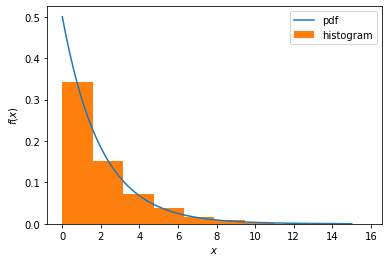

In [4]:
plt.plot(x, pdf, label='pdf')
plt.hist(sample, density = True, label='histogram')
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()

Вывод: как видно на графике выше, гистограмма выборки хорошо совпадает с теоретической оценкой плотности вероятности рассматриваемого распределения.

## Распределение выборочных средних

Выборочные средние $\bar{X}_n = \frac{1}{n} \sum\limits_{i=1}^n X_i$ по ЦПТ будут приближаться нормальным распределением $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$, где $n$ - объем выборки, $\mathbb{E}X$ и $\mathbb{D}X$ соответственно математическое ожидание и дисперсия рассматриваемого исходного распределения.

Таким образом, распределение будет приближаться нормальным распределением $N(\mu = 2,\sigma^2 = \frac{4}{n})$

In [13]:
def plot_distribution(n):
    
    sample_arrange = []
    for _ in range(1000):
        local_sample = rv.rvs(n)
        local_sample_mean = np.mean(local_sample)
        sample_arrange.append(local_sample_mean)
    
    mu = 2
    sigma = (4/n) ** 0.5
    norm_rv = sts.norm(loc=mu, scale=sigma)
    
    x = np.linspace(0, 15, 1000)
    pdf = norm_rv.pdf(x)
    
    plt.plot(x, pdf)
    plt.hist(sample_arrange, density=True, label="histogram")
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.xlabel('$\\bar{X}_n$')
    plt.title('n = %d' %n)
    plt.show()

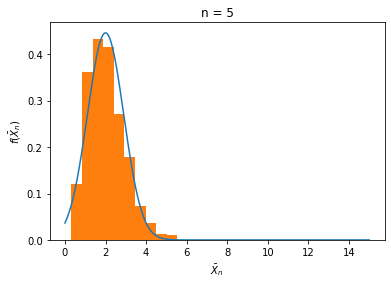

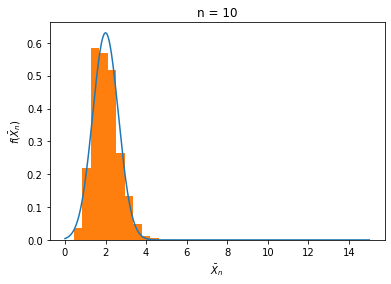

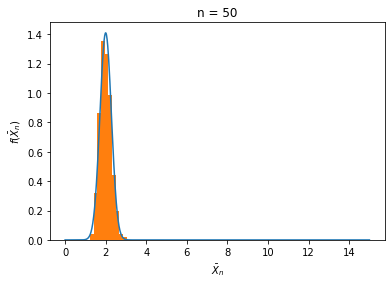

In [14]:
for n in [5, 10, 50]:
    plot_distribution(n)

Видно, что при увеличении n закон распределения средних приближается к нормальному распределению.

## Заключение
В результате исследования распределения средних значений мы показали, что исследуемое распределение приближается к нормальному распределению при увеличении размера выборки.